# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
! https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Microsoft%20Stock%20Price.csv

/bin/bash: https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Microsoft%20Stock%20Price.csv: No such file or directory


# data Loading

In [5]:
data_path = "/content/Microsoft Stock Price.csv"
dataset = pd.read_csv(data_path, parse_dates=['Date'])
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,2023-05-11,310.10,311.12,306.2601,310.11,31680180
1,2023-05-10,308.62,313.00,307.6700,312.31,30078039
2,2023-05-09,308.00,310.04,306.3100,307.00,21340830
3,2023-05-08,310.13,310.20,306.0900,308.65,21318609
4,2023-05-05,305.72,311.97,304.2700,310.65,28197051


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1349 non-null   datetime64[ns]
 1    Open    1349 non-null   float64       
 2    High    1349 non-null   float64       
 3    Low     1349 non-null   float64       
 4    Close   1349 non-null   float64       
 5    Volume  1349 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 63.4 KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03
mean,198.718012,200.823929,196.524552,198.780808,3.030106e+07
std,74.593859,75.373060,73.781757,74.626656,1.272930e+07
min,86.055000,86.310000,83.830000,85.010000,8.989150e+06
25%,125.260000,125.880000,124.210000,125.520000,2.238812e+07
50%,210.050000,212.300000,208.030000,210.110000,2.711053e+07
75%,259.750000,262.300000,256.810000,260.260000,3.437166e+07
max,344.620000,349.670000,342.200000,343.110000,1.112421e+08


In [8]:
dataset.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

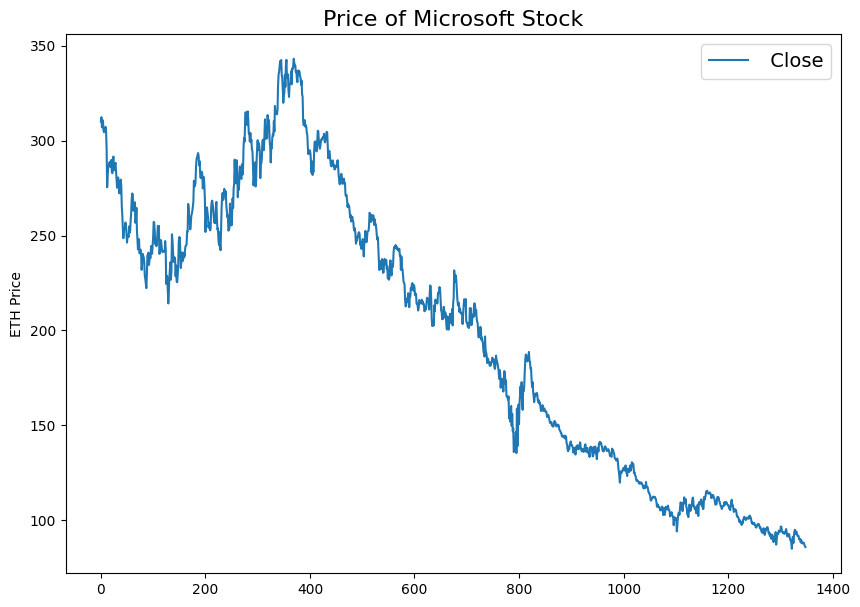

In [10]:
import matplotlib.pyplot as plt
dataset[' Close'].plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of Microsoft Stock", fontsize=16)
plt.legend(fontsize=14);

In [11]:
price_data = dataset[' Close'].values
price_data

array([310.11, 312.31, 307.  , ...,  87.11,  86.35,  85.95])

In [12]:
price_data.shape

(1349,)

In [13]:
train_data, test_data = price_data[0:1200], price_data[1200:]

In [14]:
train_data.shape, test_data.shape

((1200,), (149,))

In [15]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [16]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1192, 7), (1192,), (141, 7), (141,))

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1192, 7, 1)
(141, 7, 1)


In [19]:
X_train[0]

array([[310.11],
       [312.31],
       [307.  ],
       [308.65],
       [310.65],
       [305.41],
       [304.4 ]])

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [21]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                        

In [23]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [24]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
34/34 [==============================] - 7s 46ms/step - loss: 53475.2500 - mae: 222.5460 - val_loss: 11569.3838 - val_mae: 107.4818
Epoch 2/30
34/34 [==============================] - 1s 25ms/step - loss: 53307.7305 - mae: 222.1504 - val_loss: 11347.5986 - val_mae: 106.4442
Epoch 3/30
34/34 [==============================] - 1s 43ms/step - loss: 52318.8164 - mae: 219.5699 - val_loss: 8329.2617 - val_mae: 91.1327
Epoch 4/30
34/34 [==============================] - 1s 26ms/step - loss: 39946.8086 - mae: 183.2257 - val_loss: 8235.8086 - val_mae: 90.0924
Epoch 5/30
34/34 [==============================] - 1s 27ms/step - loss: 14241.6611 - mae: 96.0794 - val_loss: 5186.0635 - val_mae: 71.3410
Epoch 6/30
34/34 [==============================] - 1s 28ms/step - loss: 10645.7002 - mae: 85.1136 - val_loss: 6233.9604 - val_mae: 78.3856
Epoch 7/30
34/34 [==============================] - 1s 31ms/step - loss: 10327.2607 - mae: 81.8787 - val_loss: 3410.6509 - val_mae: 57.7949
Epoch 8/30
3

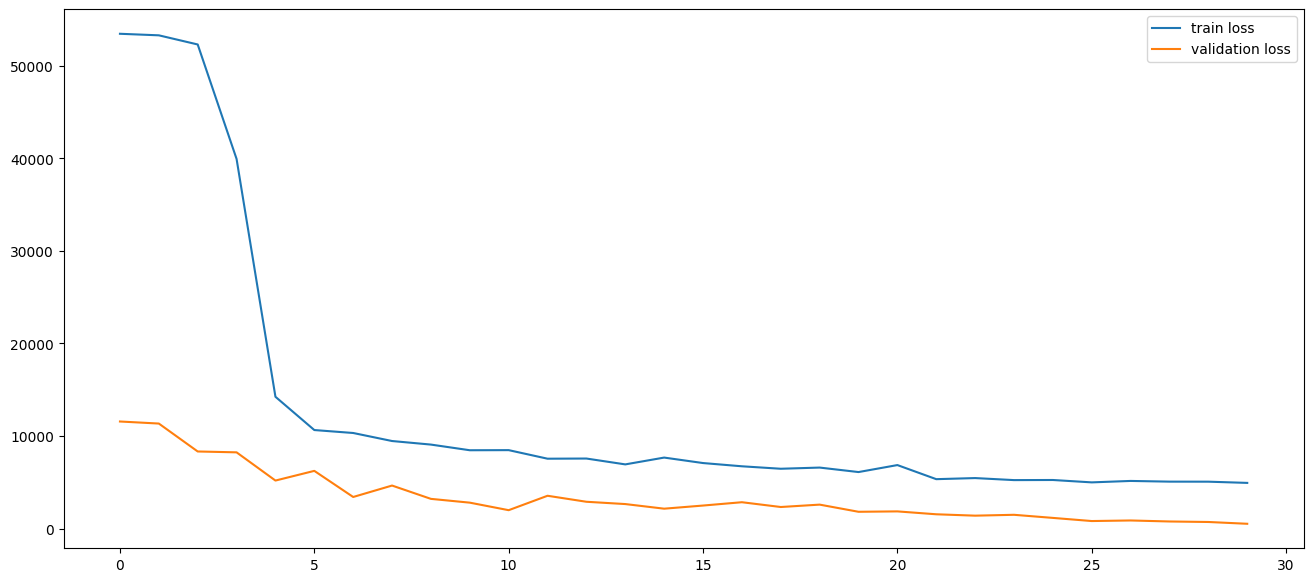

In [25]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


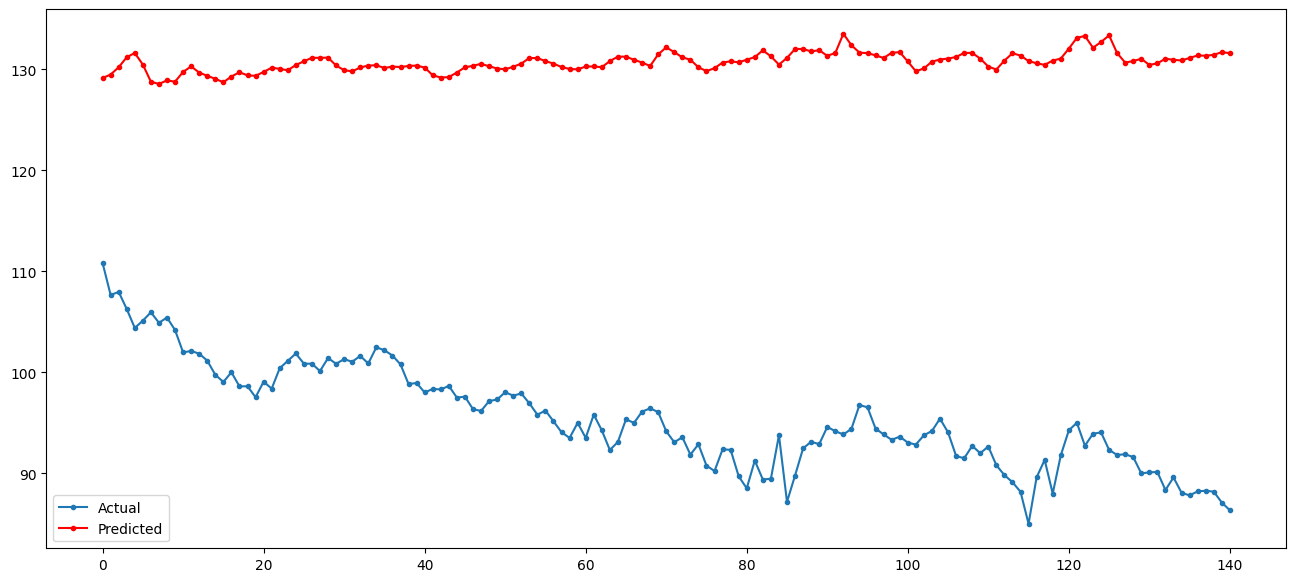

In [27]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 13.541267327690695
Train MAE: 3.254491669126164
Test RMSE: 35.67896251951569
Test MAE: 5.93569457798113


# at Inference

In [30]:
model.save("Microsoft_Stock_Price_Prediction")

In [ ]:
import tensorflow as tf
import numpy as np

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
model = tf.keras.saving.load_model("/content/Microsoft_Stock_Price_Prediction")

In [33]:
%cp -av /content/Microsoft_Stock_Price_Prediction /content/drive/MyDrive/Stock_Price_Prediction

'/content/Microsoft_Stock_Price_Prediction' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction'
'/content/Microsoft_Stock_Price_Prediction/variables' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction/variables'
'/content/Microsoft_Stock_Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Microsoft_Stock_Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction/variables/variables.index'
'/content/Microsoft_Stock_Price_Prediction/assets' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction/assets'
'/content/Microsoft_Stock_Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Stock_Price_Prediction/Microsoft_Stock_Price_Prediction/fingerprint.pb'
'/content/Microsoft_Stock_Price_Pred

In [34]:
X_test[0].shape

(7, 1)

In [35]:
prices = np.array([[310.11],
       [312.31],
       [307.  ],
       [308.65],
       [310.65],
       [305.41],
       [304.4 ]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 1s 506ms/step
Prediction Price:  312.37363


In [36]:
print("Predicted Microsoft Stock Price: {0:.2f} ".format(prediction_price))

Predicted Microsoft Stock Price: 312.37 


In [ ]:
tf.__version__

'2.12.0'